## Project: Housing prices prediction

#### Problem statement: 
To build a model to predict the selling price of a house based on its characteristics. It can be useful for house owners/real estate agents. The same model can also be used by buyers to ensure they are paying a fair price for the house they are purchasing.

### Data Description

#### Description:

- Sale Price                      : Target variable/ selling price of house listed
- Date House was Sold             : The date on which the house was sold
- Sale Price                      : Selling price of a house in $
- No of Bedrooms                  : Number of bedrooms a particular house has.
- No of Bathrooms                 : Number of bathrooms a particular house has.
- Flat Area                       : Flat area of house in Square feet.
- Lot area                        : The lot area on which the house was built in square feet.
- No of floors                    : Number of floors a particular has.
- Waterfront view                 : Whether a house has waterfront view or not.
- No of Times Visited             : It tell about how many times a house was visited before sale.
- Condition of the House          : What is condition of the house, like, fair, good, okay or excellent.
- Overall Grade                   : Grades given to house in between 1-10.
- Area of the House from Basement : How much is the area of house from basement (in Sqft)
- Basement Area                   : Basement area of a house (in Sqft)
- Age of the House (in Years)     : Number of years the house was built
- Renovated Year                  : Whether a renovated or not
- Zipcode                         : Locality of the house
- Latitude                        : 
- Longitude                       :
- Living Area after renovation    : How much was the living area after renovation (in Sqft)
- Lot Area after renovation       : How much was the lot area after renovation (in Sqft)

In [1]:
# To avoid warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

In [3]:
#to display all rows columns 
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [4]:
# loading data
df = pd.read_csv("Housing_prices.csv")
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,"October 14, 2017",221900.0,3,1.00,1180.0,5650.0,1.0,No,None,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,"December 14, 2017",538000.0,3,2.25,2570.0,7242.0,2.0,No,None,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,"February 15, 2016",180000.0,2,1.00,770.0,10000.0,1.0,No,None,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,"December 14, 2017",604000.0,4,3.00,1960.0,5000.0,1.0,No,None,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,"February 15, 2016",510000.0,3,2.00,1680.0,8080.0,1.0,No,None,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [5]:
# We will first drop "ID" column as it is not informative about the dataset.
df.drop(columns = 'ID',inplace = True)

In [6]:
# To see how many rows and columns does the dataset has.
df.shape

(21613, 20)

### Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [7]:
# To check missing values 
df.isnull().sum()

Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

There are some missing values in the target variable and in some features

In [8]:
# To check duplicates 
print("Number of duplicate values in the data = {} ".format(df.duplicated().sum()))

Number of duplicate values in the data = 2 


In [9]:
# To check and remove duplicate values from the dataset
if df.duplicated().sum() > 0 :
    #print("Number of duplicate values are = ", df.duplicated().sum())
    df.drop_duplicates() 
    print("No duplicate values present anymore.")
else:
    print("Number of duplicate values in the data = {} ".format(df.duplicated().sum()))

No duplicate values present anymore.


In [10]:
# To check datatypes as well as null values in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Date House was Sold                        21613 non-null  object 
 1   Sale Price                                 21609 non-null  float64
 2   No of Bedrooms                             21613 non-null  int64  
 3   No of Bathrooms                            21609 non-null  float64
 4   Flat Area (in Sqft)                        21604 non-null  float64
 5   Lot Area (in Sqft)                         21604 non-null  float64
 6   No of Floors                               21613 non-null  float64
 7   Waterfront View                            21613 non-null  object 
 8   No of Times Visited                        21613 non-null  object 
 9   Condition of the House                     21613 non-null  object 
 10  Overall Grade         

It can be observed that there are some missing values in some features (columns).

In [11]:
# To check number of unique values in each column
df.nunique()

Date House was Sold                          13  
Sale Price                                   3625
No of Bedrooms                               13  
No of Bathrooms                              30  
Flat Area (in Sqft)                          1036
Lot Area (in Sqft)                           9778
No of Floors                                 6   
Waterfront View                              2   
No of Times Visited                          5   
Condition of the House                       5   
Overall Grade                                10  
Area of the House from Basement (in Sqft)    946 
Basement Area (in Sqft)                      306 
Age of House (in Years)                      116 
Renovated Year                               70  
Zipcode                                      70  
Latitude                                     5034
Longitude                                    752 
Living Area after Renovation (in Sqft)       777 
Lot Area after Renovation (in Sqft)          8689


#### Descriptive Statistics

In [12]:
# Descriptive Statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sale Price,21609.0,540198.435744,367388.994461,75000.0000,321950.000000,450000.0000,645000.000,7.700000e+06
No of Bedrooms,21613.0,3.370842,0.930062,0.0000,3.000000,3.0000,4.000,3.300000e+01
No of Bathrooms,21609.0,2.114732,0.770138,0.0000,1.750000,2.2500,2.500,8.000000e+00
Flat Area (in Sqft),21604.0,2079.931772,918.487597,290.0000,1429.250000,1910.0000,2550.000,1.354000e+04
Lot Area (in Sqft),21604.0,15107.756897,41428.266183,520.0000,5040.000000,7617.5000,10688.250,1.651359e+06
No of Floors,21613.0,1.494309,0.539989,1.0000,1.000000,1.5000,2.000,3.500000e+00
Overall Grade,21613.0,7.623467,1.105439,1.0000,7.000000,7.0000,8.000,1.000000e+01
Area of the House from Basement (in Sqft),21610.0,1788.344193,827.982604,290.0000,1190.000000,1560.0000,2210.000,9.410000e+03
Basement Area (in Sqft),21613.0,291.509045,442.575043,0.0000,0.000000,0.0000,560.000,4.820000e+03
Age of House (in Years),21613.0,46.994864,29.373411,3.0000,21.000000,43.0000,67.000,1.180000e+02


Key insights from the descriptive statistics:

- Price: skewed positive with mean higher than median. Outlier at $7.7M.
- Bedrooms: Outlier at 33, We will certainly removes this particular value from the dataset.
- Lot Area : Obvious outlier at 1.6M, and mean is nearly double median.
- Renovated Year: Small proportion of homes given 75th percentile is 0.

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

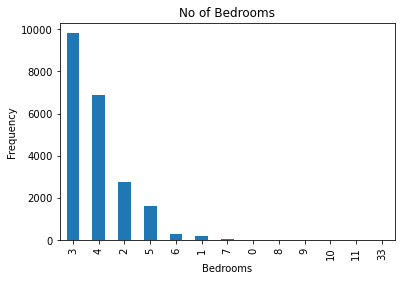

In [13]:
df['No of Bedrooms'].value_counts().plot(kind = 'bar')
plt.xlabel("Bedrooms")
plt.ylabel('Frequency')
plt.title("No of Bedrooms")
sns.despine

As we can see from the visualization 3 bedroom houses are most commonly sold followed by 4 bedroom. So how is it useful ? For a builder having this data , He can make a new building with more 3 and 4 bedroom’s to attract more buyers.

So now we know that 3 and 4 bedroom’s are highest selling.
So we drop a house with a 33 bedrooms

In [14]:
index_names = df[ (df['No of Bedrooms'] > 11)].index
df.drop(index_names, inplace = True)
df['No of Bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6     272 
1     199 
7     38  
0     13  
8     13  
9     6   
10    3   
11    1   
Name: No of Bedrooms, dtype: int64

In [15]:
# skewness 
df.skew()

Sale Price                                   4.021437 
No of Bedrooms                               0.518469 
No of Bathrooms                              0.511155 
Flat Area (in Sqft)                          1.471740 
Lot Area (in Sqft)                           13.057769
No of Floors                                 0.616107 
Overall Grade                                0.321398 
Area of the House from Basement (in Sqft)    1.446702 
Basement Area (in Sqft)                      1.578053 
Age of House (in Years)                      0.469905 
Renovated Year                               4.549373 
Zipcode                                      0.405816 
Latitude                                    -0.485119 
Longitude                                    0.884916 
Living Area after Renovation (in Sqft)       1.108178 
Lot Area after Renovation (in Sqft)          9.506541 
dtype: float64

- If skewness is less than −1 or greater than +1, the distribution can be called highly skewed.
- If skewness is between −1 and −0.5 or between 0.5 and 1, the distribution can be called moderately skewed.
- If skewness is between −0.5 and 0.5, the distribution can be called approximately symmetric.



<AxesSubplot:xlabel='Sale Price', ylabel='Density'>

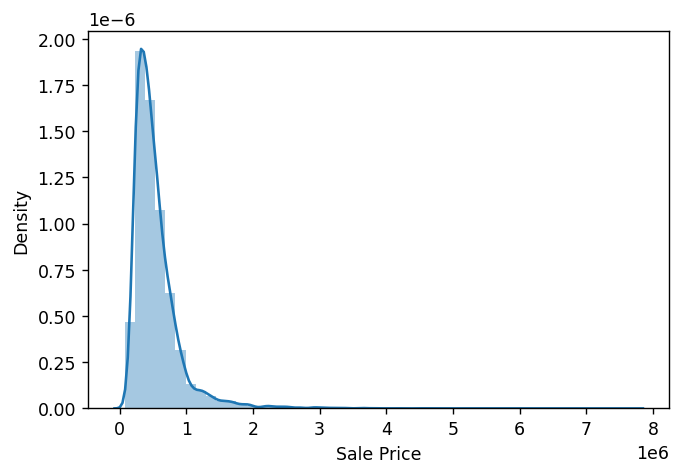

In [16]:
# Distribution plot, whether skewed or a normal distribution using graph.
plt.figure(dpi = 125)
sns.distplot(df['Sale Price'])   # distirbution of the target variable

The distribution of target variable " Sale Price " looks like right skewed. target variable is not normalize.

In [17]:
corr_matrix = df.corr()
corr_matrix["Sale Price"].sort_values(ascending=False)

Sale Price                                   1.000000
Flat Area (in Sqft)                          0.702093
Area of the House from Basement (in Sqft)    0.605518
Living Area after Renovation (in Sqft)       0.585419
Overall Grade                                0.580666
No of Bathrooms                              0.525134
Basement Area (in Sqft)                      0.323809
No of Bedrooms                               0.315566
Latitude                                     0.306884
No of Floors                                 0.256958
Renovated Year                               0.126439
Lot Area (in Sqft)                           0.089619
Lot Area after Renovation (in Sqft)          0.082449
Longitude                                    0.021518
Zipcode                                     -0.053204
Age of House (in Years)                     -0.054046
Name: Sale Price, dtype: float64

- The last sold price tends to increase when the finished sqft and the number of bathrooms go up. You can see a small negative correlation between the year built and the last sold price. And finally, coefficients close to zero indicate that there is no linear correlation.

### Treating missing values 

In [18]:
df.dropna(inplace = True, axis = 0, subset = ['Sale Price'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21608 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Date House was Sold                        21608 non-null  object 
 1   Sale Price                                 21608 non-null  float64
 2   No of Bedrooms                             21608 non-null  int64  
 3   No of Bathrooms                            21604 non-null  float64
 4   Flat Area (in Sqft)                        21599 non-null  float64
 5   Lot Area (in Sqft)                         21599 non-null  float64
 6   No of Floors                               21608 non-null  float64
 7   Waterfront View                            21608 non-null  object 
 8   No of Times Visited                        21608 non-null  object 
 9   Condition of the House                     21608 non-null  object 
 10  Overall Grade         

In [19]:
# treating independent missing values by imputing
numerical_columns = ['No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)','Area of the House from Basement (in Sqft)',
                     'Latitude','Longitude','Living Area after Renovation (in Sqft)']

In [20]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values = np.nan, strategy = 'median' )
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

In [21]:
df['Zipcode'].shape

(21608,)

In [22]:
Column = df['Zipcode'].values.reshape(-1,1)
print(Column.shape)
imputer=SimpleImputer(missing_values = np.nan, strategy = 'most_frequent' )
df['Zipcode'] = imputer.fit_transform(Column)

(21608, 1)


In [23]:
df['Zipcode'] = df['Zipcode'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21608 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Date House was Sold                        21608 non-null  object 
 1   Sale Price                                 21608 non-null  float64
 2   No of Bedrooms                             21608 non-null  int64  
 3   No of Bathrooms                            21608 non-null  float64
 4   Flat Area (in Sqft)                        21608 non-null  float64
 5   Lot Area (in Sqft)                         21608 non-null  float64
 6   No of Floors                               21608 non-null  float64
 7   Waterfront View                            21608 non-null  object 
 8   No of Times Visited                        21608 non-null  object 
 9   Condition of the House                     21608 non-null  object 
 10  Overall Grade         

### Data visualization

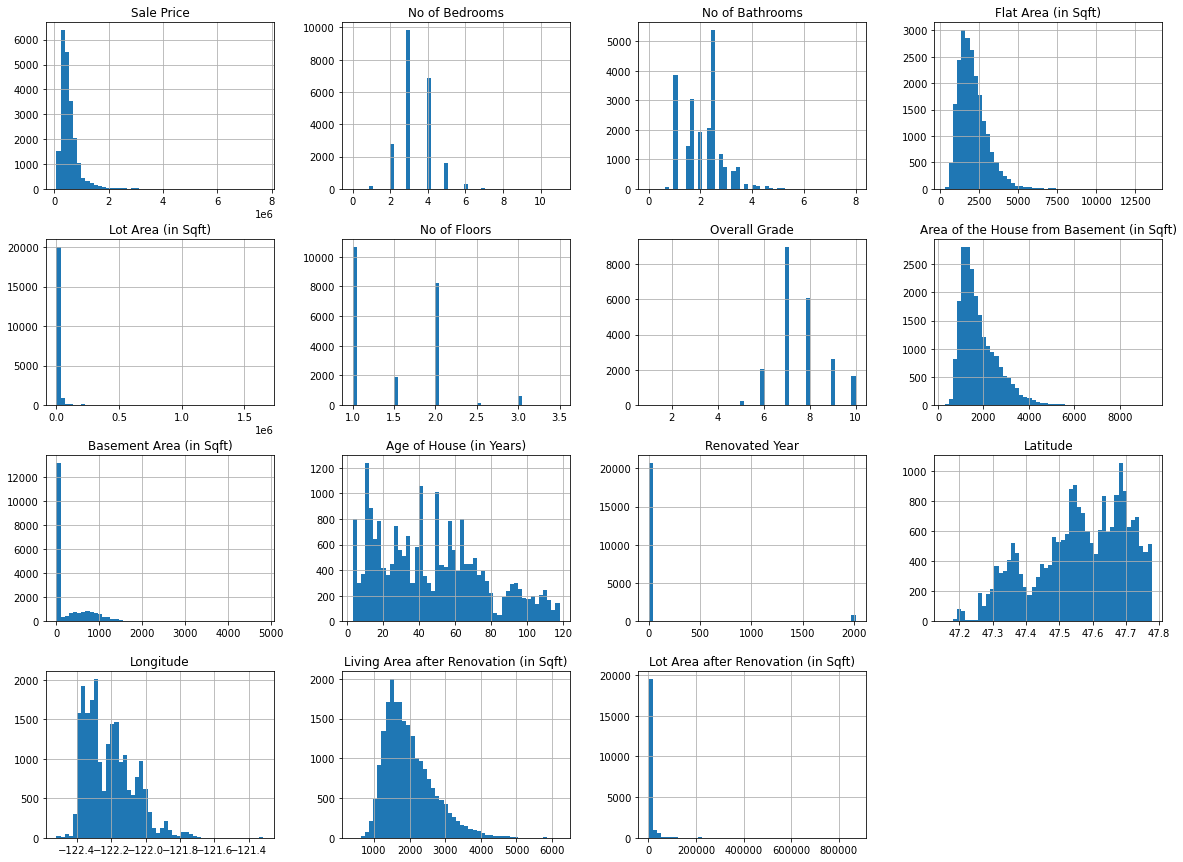

In [24]:
# Histogram of all attributes
df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [25]:
df['Waterfront View'].value_counts()

No     21445
Yes    163  
Name: Waterfront View, dtype: int64

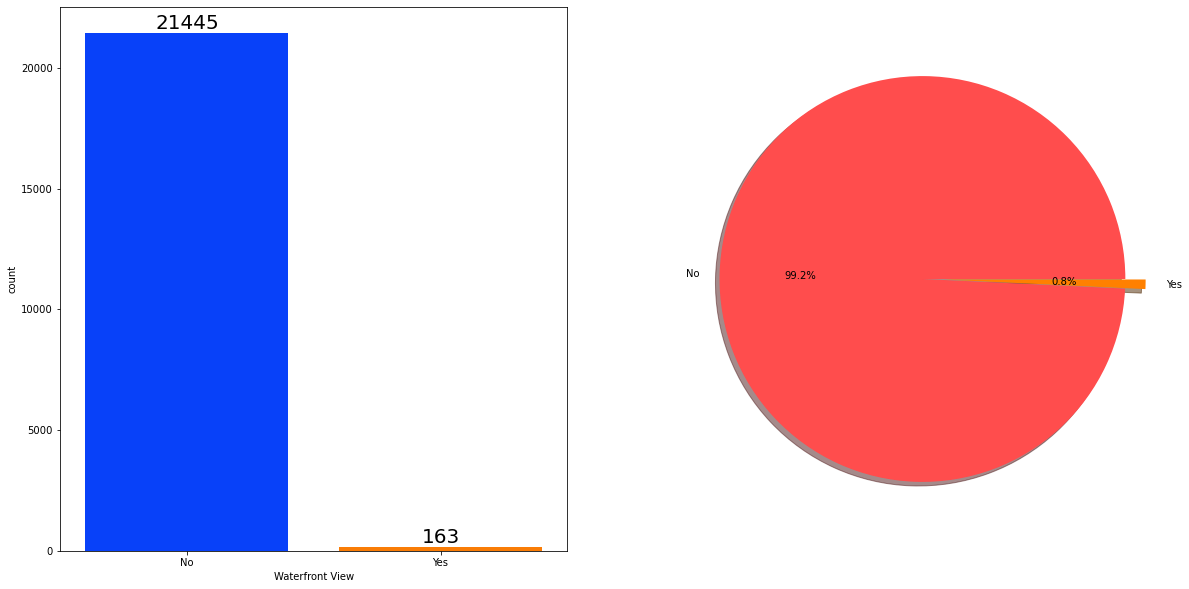

In [26]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Waterfront View'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['Waterfront View'].value_counts(),labels=['No','Yes'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

It looks like a complete imbalance data, as 99.2 % houses are without waterfront views and only 0.8 % houses are with waterfront view.

<Figure size 720x720 with 0 Axes>

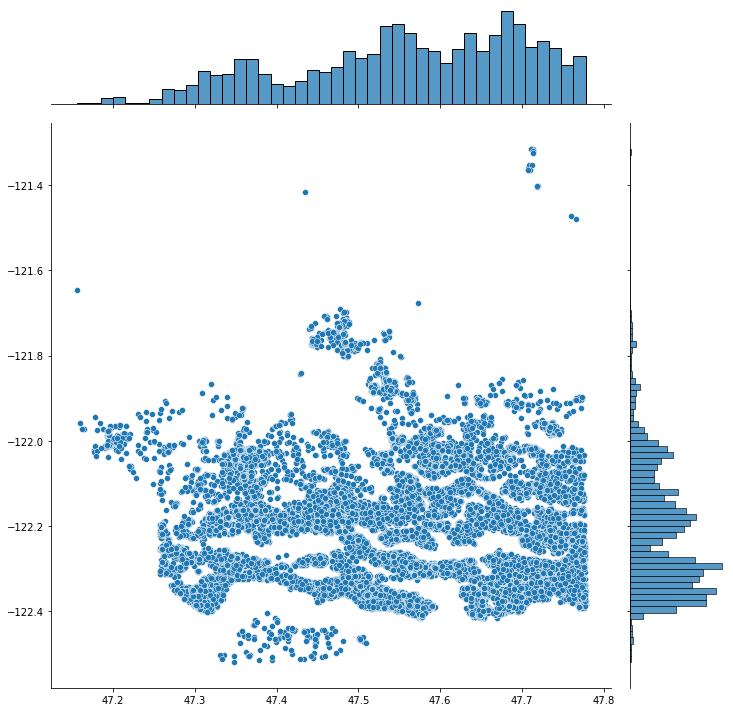

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [27]:
plt.figure(figsize = (10,10))
sns.jointplot(x = df.Latitude.values, y = df.Longitude.values, size = 10)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Longitude', fontsize = 12)
plt.show()
sns.despine

Joinplot function helps us see the concentration of data and placement of data and can be really useful. For latitude between -47.7 and -48.8 there are many houses , which would mean that maybe it’s an ideal location. But when we talk about longitude we can see that concentration is high between -122.2 to -122.4. Which would mean that most of the buy’s has been for this particular location.

<AxesSubplot:xlabel='No of Times Visited'>

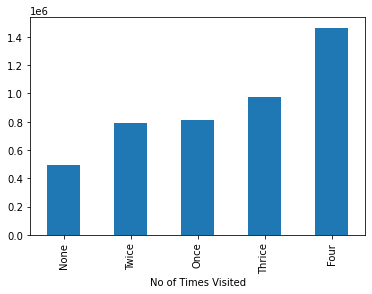

In [28]:
df.groupby('No of Times Visited')['Sale Price'].mean().sort_values().plot(kind = 'bar')

The houses which was visited more number of times has high selling prices.

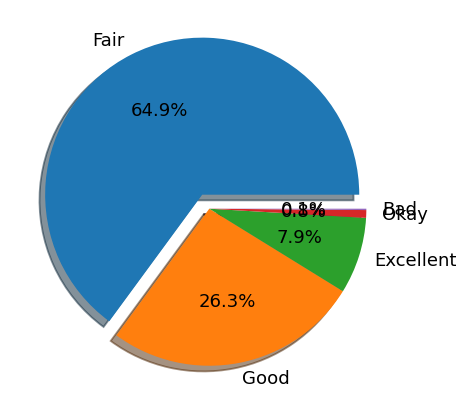

In [29]:
# pie chart
plt.figure(dpi = 130)  
plt.pie(x = df['Condition of the House'].value_counts(),
        labels=df['Condition of the House'].value_counts().index,
        explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)

#plt.legend()
plt.show() 


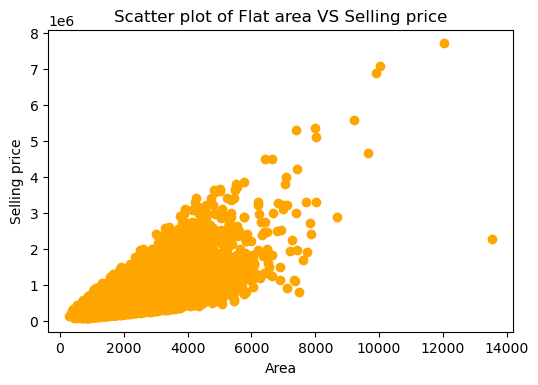

In [30]:
# scatter plot
plt.figure(dpi = 100)
plt.scatter(x=df['Flat Area (in Sqft)'],y=df['Sale Price'], color = 'orange')
plt.xlabel('Area')
plt.ylabel('Selling price')
plt.title('Scatter plot of Flat area VS Selling price')
plt.show()

Flat area and house prices are linearly related, as flat area increase house prices were also increasing.

Text(0.5, 1.0, 'Histogram of Age of House')

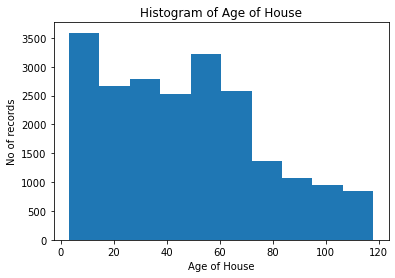

In [31]:
# Histogram
plt.hist(df['Age of House (in Years)'],bins=10)
plt.xlabel('Age of House')
plt.ylabel('No of records')
plt.title('Histogram of Age of House')

In [32]:
pivot_table = pd.pivot_table(df, index = ['Zipcode'],columns=['Condition of the House'], 
                              values = ['Sale Price'], aggfunc=np.mean,)

pivot_table

Sale Price                                                    
Condition of the House        Bad     Excellent          Fair          Good      Okay
Zipcode                                                                              
98001.0                NaN         2.425433e+05  2.927207e+05  2.527446e+05  356070.0
98002.0                NaN         2.216411e+05  2.588868e+05  2.192858e+05 NaN      
98003.0                NaN         3.706800e+05  2.992801e+05  2.809591e+05  235500.0
98004.0                 1500000.0  1.236365e+06  1.527265e+06  1.145915e+06  425000.0
98005.0                NaN         8.319500e+05  8.668012e+05  7.669397e+05  577750.0
...                     ..                  ...           ...           ...       ...
98177.0                NaN         8.966313e+05  6.496812e+05  6.665755e+05 NaN      
98178.0                NaN         2.975217e+05  3.094105e+05  3.308419e+05  175000.0
98188.0                NaN         2.853636e+05  2.900059e+05  2.867413e+05 NaN      
98198.0                NaN         3.215235e+05  2.941619e+05  3.154305e+05  270532.5
98199.0                NaN         9.338983e+05  7.604974e+05  7.963811e+05 NaN      

[70 rows x 5 columns]

## Imputing : Treating outliers

<AxesSubplot:xlabel='Sale Price'>

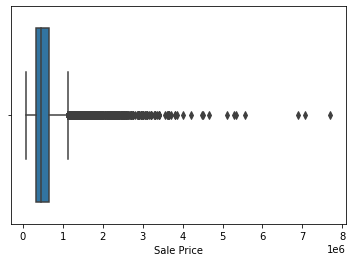

In [33]:
# checking outliers in the target variable
import seaborn as sns
sns.boxplot(x = df['Sale Price'])

In [34]:
# Treating outlier using imputing
q1 = df['Sale Price'].quantile(0.25)
q3 = df['Sale Price'].quantile(0.75)
print("First and third quartiles for target variable are Q1 = {} and Q3 = {}".format(q1,q3))

First and third quartiles for target variable are Q1 = 321837.5 and Q3 = 645000.0


In [35]:
# interquartile range and calulating lower limit, upper limit 
Iqr=q3-q1
print("Interquartile range = ", Iqr)
Lower_limit = q1-1.5*Iqr
Upper_limit = q3 + 1.5*Iqr
print("Lower_limit = ",Lower_limit)
print("Upper limit = ",Upper_limit)

Interquartile range =  323162.5
Lower_limit =  -162906.25
Upper limit =  1129743.75


In [36]:
def limit_imputer(value):
    if value > Upper_limit:
        return Upper_limit
    if value < Lower_limit:
        return Lower_limit
    else:
        return value

In [37]:
df['Sale Price'] = df['Sale Price'].apply(limit_imputer)

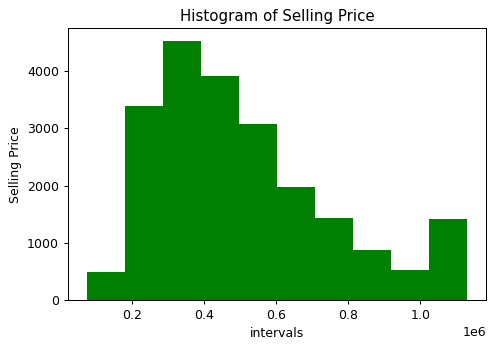

In [38]:
plt.figure(dpi = 90)
plt.hist(df['Sale Price'], bins = 10, color = 'g')
plt.xlabel('intervals')
plt.ylabel('Selling Price')
plt.title('Histogram of Selling Price')
plt.show()

In [39]:
df.head()

,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,"October 14, 2017",221900.0,3,1.00,1180.0,5650.0,1.0,No,None,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,"December 14, 2017",538000.0,3,2.25,2570.0,7242.0,2.0,No,None,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,"February 15, 2016",180000.0,2,1.00,770.0,10000.0,1.0,No,None,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,"December 14, 2017",604000.0,4,3.00,1960.0,5000.0,1.0,No,None,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,"February 15, 2016",510000.0,3,2.00,1680.0,8080.0,1.0,No,None,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


## Feature Engineering

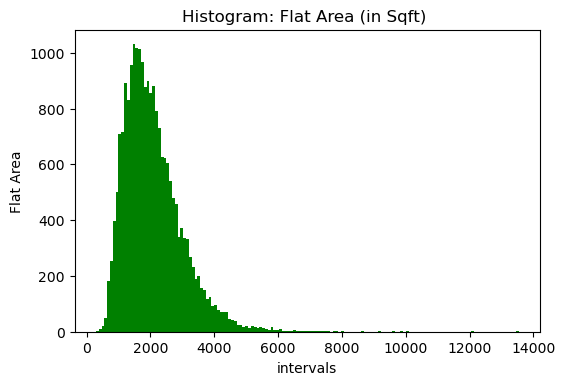

In [40]:
plt.figure(dpi = 100)
plt.hist(df['Flat Area (in Sqft)'], bins = 150, color = 'g')
plt.xlabel('intervals')
plt.ylabel('Flat Area')
plt.title('Histogram: Flat Area (in Sqft) ')
plt.show()

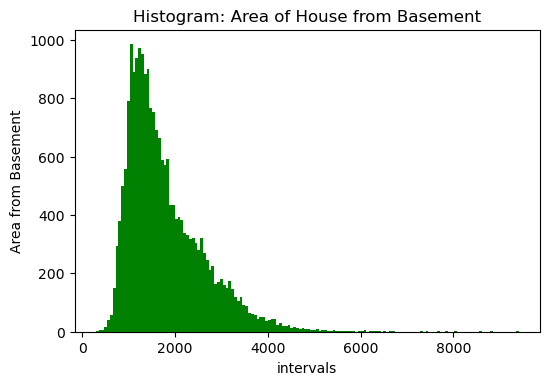

In [41]:
plt.figure(dpi = 100)
plt.hist(df['Area of the House from Basement (in Sqft)'], bins = 150, color = 'g')
plt.xlabel('intervals')
plt.ylabel('Area from Basement')
plt.title('Histogram: Area of House from Basement')
plt.show()

In [42]:
def tr_log(sample_data):
    return np.log(sample_data)

In [43]:
df['Flat Area (in Sqft)'] = df['Flat Area (in Sqft)'].map(tr_log)

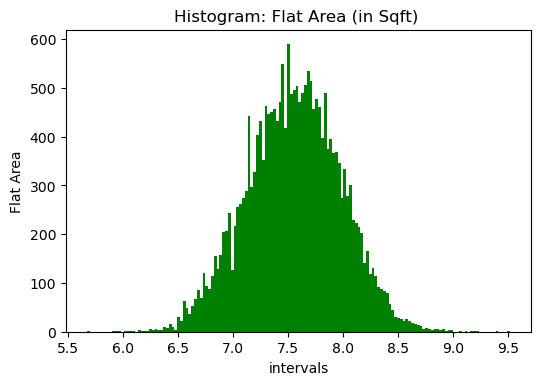

In [44]:
plt.figure(dpi = 100)
plt.hist(df['Flat Area (in Sqft)'], bins = 150, color = 'g')
plt.xlabel('intervals')
plt.ylabel('Flat Area')
plt.title('Histogram: Flat Area (in Sqft) ')
plt.show()

In [45]:
df['Area of the House from Basement (in Sqft)'] = df['Area of the House from Basement (in Sqft)'].map(tr_log)

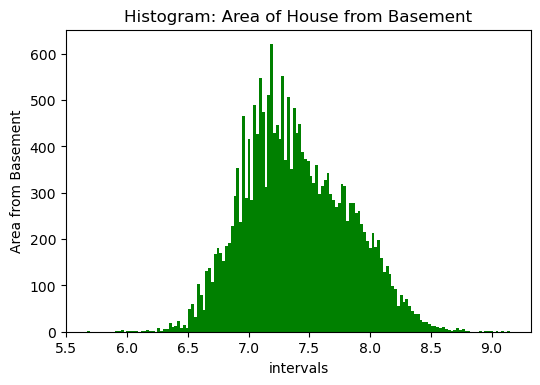

In [46]:
plt.figure(dpi = 100)
plt.hist(df['Area of the House from Basement (in Sqft)'], bins = 150, color = 'g')
plt.xlabel('intervals')
plt.ylabel('Area from Basement')
plt.title('Histogram: Area of House from Basement')
plt.show()

<AxesSubplot:xlabel='Lot Area (in Sqft)', ylabel='Density'>

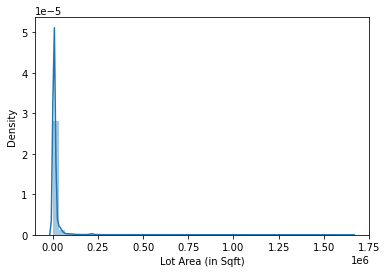

In [47]:
sns.distplot(df['Lot Area (in Sqft)'])

<AxesSubplot:xlabel='Lot Area (in Sqft)', ylabel='Density'>

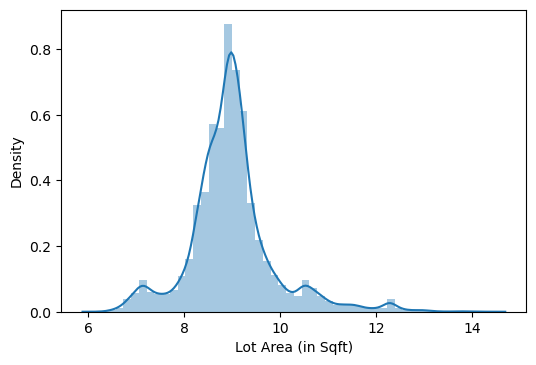

In [48]:
plt.figure(dpi = 100)
df['Lot Area (in Sqft)'] = df['Lot Area (in Sqft)'].map(tr_log)
sns.distplot(df['Lot Area (in Sqft)'])

In [49]:
# mapping
df['No of Times Visited'].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [50]:
mapping = {'None':'0','Thrice':'3','Four':'4','Twice':'2','Once':'1'}
df['No of Times Visited'] = df['No of Times Visited'].map(mapping)
df['No of Times Visited'].unique()

array(['0', '3', '4', '2', '1'], dtype=object)

In [51]:
# generating new features from existising features
df['Ever_Renovated'] = np.where(df['Renovated Year']==0,'No','Yes')
df['Ever_Renovated'].unique()

array(['No', 'Yes'], dtype=object)

First we make a column called "purchase year" from date house was sold column, and create a new feature that will tell us that before how many years was the house renovated.

In [52]:
df['Purchase Year'] = pd.DatetimeIndex(df['Date House was Sold']).year

In [53]:
df['Year since Renovation'] = np.where(df['Ever_Renovated']=='Yes',
                                                   abs(df['Purchase Year']-df['Renovated Year']),0)
df['Year since Renovation'].head()

0    0 
1    26
2    0 
3    0 
4    0 
Name: Year since Renovation, dtype: int64

In [54]:
df.drop(columns = ['Date House was Sold','Purchase Year','Renovated Year'],inplace = True, axis = 1)

In [55]:
df['Condition of the House'].value_counts()

Fair         14028
Good         5678 
Excellent    1700 
Okay         172  
Bad          30   
Name: Condition of the House, dtype: int64

<AxesSubplot:xlabel='Condition of the House'>

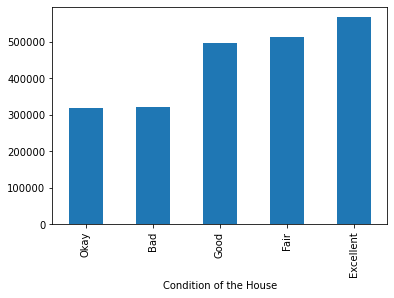

In [56]:
df.groupby('Condition of the House')['Sale Price'].mean().sort_values().plot(kind = 'bar')

In [57]:
mapping = {"Okay":"Okay","Bad":"Okay","Good":"Fair","Fair":"Fair","Excellent":"Excellent"}
df['Condition of the House'] = df['Condition of the House'].map(mapping)

<AxesSubplot:xlabel='Condition of the House'>

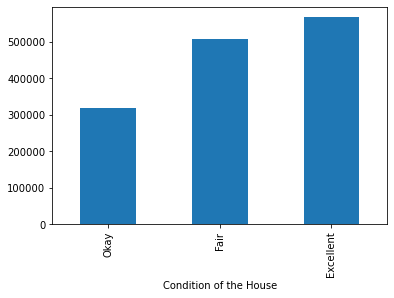

In [58]:
df.groupby('Condition of the House')['Sale Price'].mean().sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Ever_Renovated'>

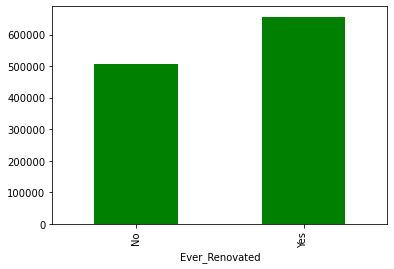

In [59]:
df.groupby('Ever_Renovated')['Sale Price'].mean().plot(kind = 'bar', color = 'green')

### ANOVA

Anova is use to identify the relationship between a numerical target variable and a categorical variable. It checks whether the average value of the target variable accross different levels of categorical variable are equal or not.

Here we use one way anova to check the relationship between " Sale Price " and three categorical variables
- House_conditions
- Waterfront_view
- Ever_Renovated

In [60]:
# importing libraries
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [61]:
# Renaming columns 
df = df.rename(columns = { 'Sale Price' : 'Sale_Price'})
df = df.rename(columns = { 'Ever Renovated' : 'Ever_Renovated'})
df = df.rename(columns = { 'Waterfront View' : 'Waterfront_view'})
df = df.rename(columns = { 'Condition of the House' : 'House_conditions'})

In [62]:
mod = ols('Sale_Price ~ House_conditions',data = df).fit()
Anova_table = sm.stats.anova_lm(mod,typ = 2)

In [63]:
print(Anova_table)

                        sum_sq       df           F        PR(>F)
House_conditions  1.306355e+13  2.0      105.443996  2.681073e-46
Residual          1.338332e+15  21605.0 NaN         NaN          


In [64]:
mod = ols('Sale_Price ~ Waterfront_view',data = df).fit()
Anova_table = sm.stats.anova_lm(mod,typ = 2)

In [65]:
print(Anova_table)

                       sum_sq       df          F         PR(>F)
Waterfront_view  3.285243e+13  1.0      538.32886  1.193605e-117
Residual         1.318543e+15  21606.0 NaN        NaN           


In [66]:
mod = ols('Sale_Price ~ Ever_Renovated',data = df).fit()
Anova_table = sm.stats.anova_lm(mod,typ = 2)

In [67]:
print(Anova_table)

                      sum_sq       df           F        PR(>F)
Ever_Renovated  1.999136e+13  1.0      324.419425  5.310788e-72
Residual        1.331404e+15  21606.0 NaN         NaN          


Interpretation : In all three cases p-value is < 0.05, there is 5% probability that the difference in means is purly a coincidence one can be 95% or more confident that the difference in means actually exists. 

Conclusion : The means are different and categorical variables does not have an impact on target variable.

## Dummy variables

In [68]:
df = pd.get_dummies(df, columns =['Waterfront_view','Ever_Renovated'
                                                          ,'House_conditions'], drop_first = True)

In [69]:
df.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year since Renovation,Waterfront_view_Yes,Ever_Renovated_Yes,House_conditions_Fair,House_conditions_Okay
0,221900.0,3,1.00,7.073270,8.639411,1.0,0,7,7.073270,0,63,98178.0,47.5112,-122.257,1340.0,5650,0,0,0,1,0
1,538000.0,3,2.25,7.851661,8.887653,2.0,0,7,7.682482,400,67,98125.0,47.7210,-122.319,1690.0,7639,26,0,1,1,0
2,180000.0,2,1.00,6.646391,9.210340,1.0,0,6,6.646391,0,85,98028.0,47.7379,-122.233,2720.0,8062,0,0,0,1,0
3,604000.0,4,3.00,7.580700,8.517193,1.0,0,7,6.956545,910,53,98136.0,47.5208,-122.393,1360.0,5000,0,0,0,0,0
4,510000.0,3,2.00,7.426549,8.997147,1.0,0,8,7.426549,0,31,98074.0,47.6168,-122.045,1800.0,7503,0,0,0,1,0


In [70]:
Zip_table = df.groupby('Zipcode').agg({'Sale_Price' : 'mean'}).sort_values('Sale_Price',ascending = True)

In [71]:
Zip_table.head(5)

,Sale_Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [72]:
Zip_table['Zipcode_Group'] = pd.cut(Zip_table['Sale_Price'],bins = 10,labels = ['Zipcode_Group_0',
                                                                                'Zipcode_Group_1',
                                                                                'Zipcode_Group_2',
                                                                                'Zipcode_Group_3',
                                                                               'Zipcode_Group_4',
                                                                               'Zipcode_Group_5',
                                                                               'Zipcode_Group_6',
                                                                               'Zipcode_Group_7',
                                                                               'Zipcode_Group_8',
                                                                               'Zipcode_Group_9']
                                                                            ,include_lowest = True)                             

In [73]:
zip_table = Zip_table.drop(columns = 'Sale_Price')

In [74]:
Transformed_data = pd.merge(df,zip_table,left_on = 'Zipcode',how = 'left',right_index = True)

In [75]:
Transformed_data = Transformed_data.drop(columns = 'Zipcode')

In [76]:
Transformed_data = pd.get_dummies(Transformed_data, columns = ['Zipcode_Group'], drop_first = True)

In [77]:
#Transformed_data = Transformed_data.drop(columns = ['ID'])

In [78]:
Transformed_data

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year since Renovation,Waterfront_view_Yes,Ever_Renovated_Yes,House_conditions_Fair,House_conditions_Okay,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,7.073270,8.639411,1.0,0,7,7.073270,0,63,47.5112,-122.257,1340.0,5650,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,7.851661,8.887653,2.0,0,7,7.682482,400,67,47.7210,-122.319,1690.0,7639,26,0,1,1,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,6.646391,9.210340,1.0,0,6,6.646391,0,85,47.7379,-122.233,2720.0,8062,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,7.580700,8.517193,1.0,0,7,6.956545,910,53,47.5208,-122.393,1360.0,5000,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,7.426549,8.997147,1.0,0,8,7.426549,0,31,47.6168,-122.045,1800.0,7503,0,0,0,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,7.333023,7.030857,3.0,0,8,7.333023,0,9,47.6993,-122.346,1530.0,1509,0,0,0,1,0,0,0,1,0,0,0,0,0,0
21609,400000.0,4,2.50,7.745003,8.667852,2.0,0,8,7.745003,0,4,47.5107,-122.362,1830.0,7200,0,0,0,1,0,1,0,0,0,0,0,0,0,0
21610,402101.0,2,0.75,6.927558,7.207860,2.0,0,7,6.927558,0,9,47.5944,-122.299,1020.0,2007,0,0,0,1,0,0,0,1,0,0,0,0,0,0
21611,400000.0,3,2.50,7.377759,7.778211,2.0,0,8,7.377759,0,14,47.5345,-122.069,1410.0,1287,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [79]:
#Transformed_data.to_csv("modified_housing_prices.csv")

In [80]:
Y = Transformed_data.iloc[:,0]

In [81]:
X = Transformed_data.iloc[:,1:29]

### Building a mean prediction model

In [82]:
# Average or the mean of sale price
Transformed_data['mean_sales'] = Transformed_data['Sale_Price'].mean()
Transformed_data['mean_sales'].head()

0    511621.668097
1    511621.668097
2    511621.668097
3    511621.668097
4    511621.668097
Name: mean_sales, dtype: float64

This is the simplest prediction model, this model predicts that every house would sell for same price irrespective of its characteristics which is the average of the sale price of a dataset. In reality that would not be the case.

In [83]:
#plt.style.available

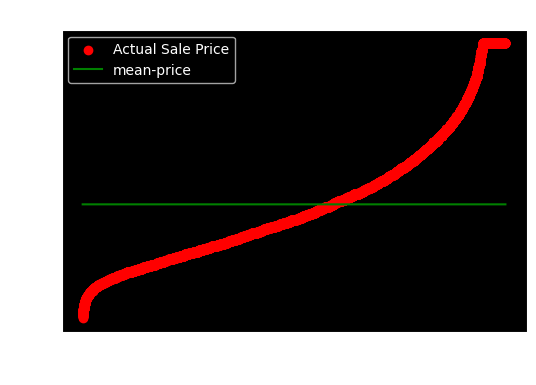

In [84]:
# Visualize the mean prediction model, by oberving the predictions and ploting then with actual sale prices)
plt.figure(dpi = 100)
plt.style.use('dark_background')
k = range(0,len(Transformed_data))
plt.scatter(k,Transformed_data['Sale_Price'].sort_values(),color = 'red',label = 'Actual Sale Price')
plt.plot(k,Transformed_data['mean_sales'].sort_values(),color ='green',label = 'mean-price')
plt.xlabel("Fitted points (Ascending)")
plt.ylabel('Sale_Price')
plt.title('Overall Mean')
plt.legend()

From the graph it can be visualize that the mean sale price is almost at the middle. The mean sale is not a good predictor for very high priced and low priced houses.
- Implies model does not fit better

In [85]:
# Average sale price with respect to overall grade of the house
grades_mean = Transformed_data.pivot_table(values = 'Sale_Price',columns = 'Overall Grade',aggfunc = np.mean)
grades_mean

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129743.75,205666.666667,214381.034483,248523.971074,301882.097522,402213.362776,537587.476014,736955.870363,960482.420364


Houses with overall grade 1 has average sale price 142k, houses with overall grade 3 has average sale proice 205k. ingenral average sale pice increase with increase in overall grade.

The average sale price for overall grade 2 is 1.13M approximately. This could be due to presense of some high values in the dataset which are closed to upper limit and lower limit.

In [86]:
Transformed_data['grade_mean'] = 0

for i in grades_mean.columns :
    Transformed_data['grade_mean'][Transformed_data['Overall Grade'] == i] = grades_mean[i][0]
    
Transformed_data['grade_mean'].head()

0    402213.362776
1    402213.362776
2    301882.097522
3    402213.362776
4    537587.476014
Name: grade_mean, dtype: float64

In [87]:
mean_difference = Transformed_data['mean_sales']-Transformed_data['Sale_Price']

In [88]:
grade_mean_difference = Transformed_data['grade_mean']-Transformed_data['Sale_Price']

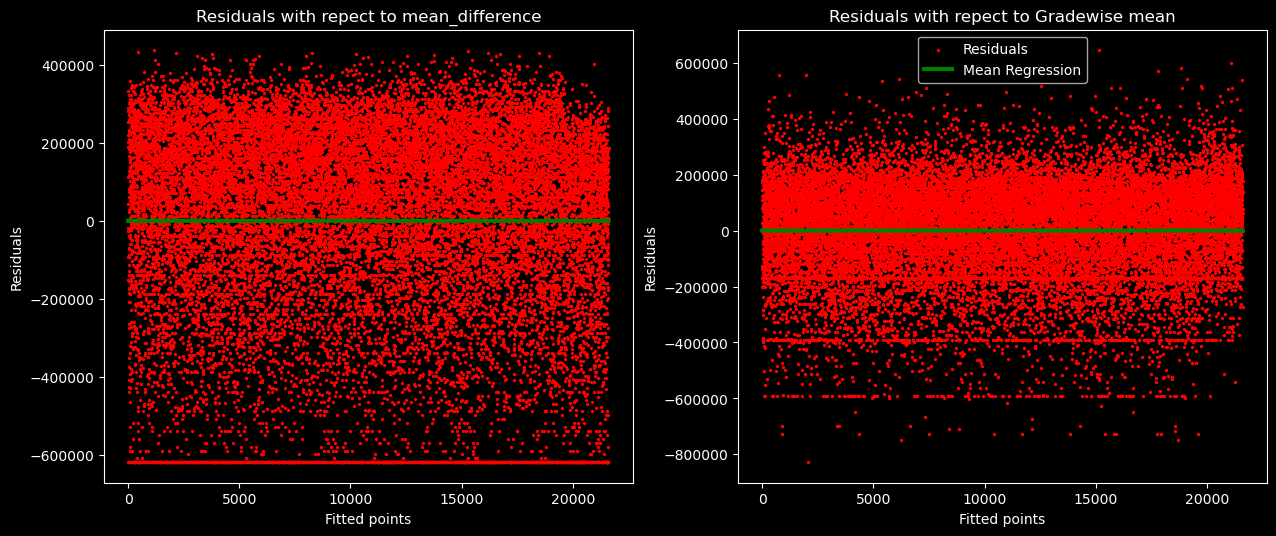

In [89]:
k = range(0,len(Transformed_data))               # list of indices for data points
l = [0 for i in range(len(Transformed_data))]    # list of zeros/ shows residual for a perfect model.

plt.figure(figsize = (15,6),dpi = 100)

plt.subplot(1,2,1)

plt.scatter(k, mean_difference, color = 'red', label = 'Residuals',s = 2)   # Residual plot for overall mean sale price
plt.plot(k,l,color = 'green',label = 'Mean Regression',linewidth = 3)
plt.xlabel('Fitted points')
plt.ylabel('Residuals')
plt.title("Residuals with repect to mean_difference")

plt.subplot(1,2,2)

plt.scatter(k, grade_mean_difference, color = 'red', label = 'Residuals',s = 2) # mean sale price with respect to overal
plt.plot(k,l,color = 'green',label = 'Mean Regression',linewidth = 3)
plt.xlabel('Fitted points')
plt.ylabel('Residuals')
plt.legend()
plt.title("Residuals with repect to Gradewise mean")

plt.legend()

The zero line representing residuals of a perfect model which would be zeros.

First model has larger spread of residuals as compared to the second model. Which means the second model is closer to the zero line i.e the perfect model.

Conclusion : The mean regression based on a categorical features will give the better results.

### Model evaluation metrics

In [90]:
# Individual error term/ residual = Prediction - Actual

Y = Transformed_data['Sale_Price']
Yhat1 = Transformed_data['mean_sales']
Yhat2 = Transformed_data['grade_mean']

n = len(Transformed_data)

len(Y),len(Yhat1),len(Yhat2),n

(21608, 21608, 21608, 21608)

In [91]:
from sklearn.metrics import mean_absolute_error
cost_mean = mean_absolute_error(Yhat1,Y)
cost_grade_mean = mean_absolute_error(Yhat2,Y)

cost_mean, cost_grade_mean

(199181.68131903515, 137084.0621341576)

Mean absolute error tells us that how far, on an average, the actual point is expected to lie from the predicted point.

Lower the value of mean absoulte error, better a model fits the dataset

#### Mean Squared error 
Mean squared error turns all the differences between the actual and the predicted into a positive quantity. It incurs extra penalty for the large difference between the actual and predicted values.

In [92]:
from sklearn.metrics import mean_squared_error
cost_mean = mean_squared_error(Yhat1,Y)
cost_grade_mean = mean_squared_error(Yhat2,Y)

cost_mean, cost_grade_mean

(62541436012.195625, 30808627752.026836)

Mean squared error (MSE) value of model 1 is significantly larger than MSE value of model 2.

#### Root Mean squared error (RMSE)
Gives the expected average distance between actual points and the predictions by taking the square root of mean squared error. 

In [93]:
cost_mean = mean_squared_error(Yhat1,Y)**0.5
cost_grade_mean = mean_squared_error(Yhat2,Y)**0.5

cost_mean, cost_grade_mean 

(250082.85829339767, 175523.86661655683)

#### R squared
It indicates how much variation of a dependent variable is explained by the independent variable (s) in a regression model.

In [94]:
Y = Transformed_data['Sale_Price']
Y_bar = Transformed_data['mean_sales']     # prediction from model 1
Y_hat = Transformed_data['grade_mean']     # predictions from model 2

len(Y),len(Y_bar),len(Y_hat),n

(21608, 21608, 21608, 21608)

In [95]:
mse_model = mean_squared_error(Y_hat,Y)
mse_mean = mean_squared_error(Y_bar,Y)
mse_model,mse_mean

(30808627752.026836, 62541436012.195625)

In [96]:
R2 = 1 - (mse_model/mse_mean)
R2

0.5073885456352628

Interpretation:  50% of the variation in the output/target variable is explained by the regression model

DRAWBACK : It will either stay the same or increase with the addition of the more variables,even if they do not have any relationship with the output variable.

#### Linear Regression:


In [97]:
data = pd.read_csv('modified_Housing_prices.csv')
data

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year since Renovation,Waterfront_view_Yes,Ever_Renovated_Yes,House_conditions_Fair,House_conditions_Okay,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,7.073270,2.156334,1.0,0,7,7.073270,0,63,47.5112,-122.257,1340,5650,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,7.851661,2.184663,2.0,0,7,7.682482,400,67,47.7210,-122.319,1690,7639,26,0,1,1,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,6.646391,2.220327,1.0,0,6,6.646391,0,85,47.7379,-122.233,2720,8062,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,7.580700,2.142087,1.0,0,7,6.956545,910,53,47.5208,-122.393,1360,5000,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,7.426549,2.196908,1.0,0,8,7.426549,0,31,47.6168,-122.045,1800,7503,0,0,0,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21601,360000.0,3,2.50,7.333023,1.950309,3.0,0,8,7.333023,0,9,47.6993,-122.346,1530,1509,0,0,0,1,0,0,0,1,0,0,0,0,0,0
21602,400000.0,4,2.50,7.745003,2.159621,2.0,0,8,7.745003,0,4,47.5107,-122.362,1830,7200,0,0,0,1,0,1,0,0,0,0,0,0,0,0
21603,402101.0,2,0.75,6.927558,1.975172,2.0,0,7,6.927558,0,9,47.5944,-122.299,1020,2007,0,0,0,1,0,0,0,1,0,0,0,0,0,0
21604,400000.0,3,2.50,7.377759,2.051326,2.0,0,8,7.377759,0,14,47.5345,-122.069,1410,1287,0,0,0,1,0,0,0,0,1,0,0,0,0,0


## Scaling the dataset

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['Sale_Price']
x = scaler.fit_transform(data.drop(columns = ['Sale_Price']))
x = pd.DataFrame(data = x, columns = data.drop(columns = ['Sale_Price']).columns)
x.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year since Renovation,Waterfront_view_Yes,Ever_Renovated_Yes,House_conditions_Fair,House_conditions_Okay,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.407008,-1.447455,-1.123371,-0.357460,-0.915396,-0.305814,-0.563909,-0.752307,-0.658659,0.544663,-0.352522,-0.306377,-0.943449,-0.260779,-0.167475,-0.087187,-0.210171,0.310691,-0.097147,-0.350509,-0.482199,-0.419558,-0.479061,-0.214102,-0.287733,-0.112282,-0.168862,-0.048162
1,-0.407008,0.175653,0.709310,-0.067824,0.937088,-0.305814,-0.563909,0.672565,0.245127,0.680849,1.161627,-0.746635,-0.432805,-0.187942,4.756895,-0.087187,4.758041,0.310691,-0.097147,-0.350509,2.073833,-0.419558,-0.479061,-0.214102,-0.287733,-0.112282,-0.168862,-0.048162
2,-1.508575,-1.447455,-2.128435,0.296808,-0.915396,-0.305814,-1.468491,-1.750724,-0.658659,1.293684,1.283596,-0.135955,1.069948,-0.172452,-0.167475,-0.087187,-0.210171,0.310691,-0.097147,-0.350509,2.073833,-0.419558,-0.479061,-0.214102,-0.287733,-0.112282,-0.168862,-0.048162
3,0.694559,1.149517,0.071346,-0.503129,-0.915396,-0.305814,-0.563909,-1.025310,1.397455,0.204200,-0.283238,-1.272103,-0.914269,-0.284582,-0.167475,-0.087187,-0.210171,-3.218637,-0.097147,-0.350509,-0.482199,2.383462,-0.479061,-0.214102,-0.287733,-0.112282,-0.168862,-0.048162
4,-0.407008,-0.148969,-0.291594,0.057366,-0.915396,-0.305814,0.340673,0.073969,-0.658659,-0.544821,0.409604,1.199019,-0.272317,-0.192922,-0.167475,-0.087187,-0.210171,0.310691,-0.097147,-0.350509,-0.482199,-0.419558,2.087415,-0.214102,-0.287733,-0.112282,-0.168862,-0.048162


In [99]:
## Checking and Removing Multicolinearity

In [100]:
x.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year since Renovation,Waterfront_view_Yes,Ever_Renovated_Yes,House_conditions_Fair,House_conditions_Okay,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
No of Bedrooms,1.000000,0.529116,0.636441,0.203771,0.181362,0.081953,0.358739,0.528989,0.309717,-0.159241,-0.010331,0.133903,0.402706,0.030387,-0.007135,-0.006614,0.019325,-0.000944,-0.063379,-0.010364,-0.039617,-0.079587,0.025762,0.020198,0.092788,0.017293,0.105484,0.036634
No of Bathrooms,0.529116,1.000000,0.761261,0.090062,0.500853,0.187787,0.635679,0.694760,0.283826,-0.505988,0.024587,0.223176,0.568589,0.087221,0.003548,0.063759,0.050279,0.062775,-0.089096,-0.032818,-0.081472,-0.034411,0.084033,0.052800,0.123252,0.037744,0.110009,0.067870
Flat Area (in Sqft),0.636441,0.761261,1.000000,0.328549,0.368099,0.246751,0.721912,0.865041,0.423259,-0.349669,0.039457,0.255301,0.736273,0.160781,0.020269,0.079319,0.050808,0.047608,-0.095749,-0.046558,-0.066564,-0.083665,0.097503,0.072118,0.151355,0.047161,0.148081,0.067207
Lot Area (in Sqft),0.203771,0.090062,0.328549,1.000000,-0.270877,0.121348,0.150808,0.318650,0.100241,0.027483,-0.154370,0.372913,0.368484,0.577153,0.033803,0.074048,0.024740,-0.016571,0.041689,0.026429,0.089608,-0.205030,-0.031659,0.045618,-0.014080,-0.082445,0.083642,0.038871
No of Floors,0.181362,0.500853,0.368099,-0.270877,1.000000,0.029551,0.461267,0.547858,-0.245524,-0.489123,0.049735,0.125839,0.280295,-0.011146,-0.000879,0.023736,0.006326,0.135071,-0.060864,-0.003340,-0.067857,0.079413,0.071540,0.009233,0.069910,0.065010,-0.008613,0.005875
No of Times Visited,0.081953,0.187787,0.246751,0.121348,0.029551,1.000000,0.223707,0.158620,0.276983,0.053374,0.006174,-0.078505,0.280433,0.072546,0.093540,0.401855,0.104043,-0.027326,-0.015904,-0.065016,0.004734,0.005927,0.003526,0.024792,0.068133,-0.012552,0.065328,0.012921
Overall Grade,0.358739,0.635679,0.721912,0.150808,0.461267,0.223707,1.000000,0.722245,0.145294,-0.456615,0.111269,0.201882,0.681559,0.107632,-0.024375,0.070346,0.010030,0.114914,-0.107421,-0.075470,-0.121348,-0.047769,0.151169,0.095640,0.200590,0.077142,0.156979,0.048646
Area of the House from Basement (in Sqft),0.528989,0.694760,0.865041,0.318650,0.547858,0.158620,0.722245,1.000000,-0.050587,-0.451142,-0.018475,0.360253,0.714587,0.174917,0.012982,0.060705,0.026289,0.111064,-0.081499,-0.017446,-0.056663,-0.098742,0.092732,0.057172,0.123235,0.029624,0.125499,0.066043
Basement Area (in Sqft),0.309717,0.283826,0.423259,0.100241,-0.245524,0.276983,0.145294,-0.050587,1.000000,0.133027,0.110435,-0.144846,0.200337,0.017262,0.029160,0.080597,0.070972,-0.111071,-0.030540,-0.069149,-0.032301,0.006166,0.016505,0.040665,0.090210,0.051129,0.101162,0.023776
Age of House (in Years),-0.159241,-0.505988,-0.349669,0.027483,-0.489123,0.053374,-0.456615,-0.451142,0.133027,1.000000,0.148061,-0.409708,-0.326453,-0.071066,0.203381,0.026144,0.225188,-0.259785,0.081501,-0.070150,0.022054,0.095762,-0.056855,-0.009985,0.025696,0.101487,-0.002720,-0.002496


In [101]:
# independent variables with correlation greater than 0.5 
k = x.corr()
z = [[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] > abs(0.5)) & (i!=j)]
z,len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bedrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade',

# Calculating VIF
syntax of the list comprehension:

Result = [(element of final list)x(how to take different values)x(condition to store final element)]

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = x
VIF = pd.Series([variance_inflation_factor(vif_data,i) for i in range(vif_data.shape[1])],index = vif_data.columns)

In [103]:
VIF

No of Bedrooms                               1.855230 
No of Bathrooms                              3.343083 
Flat Area (in Sqft)                          32.795757
Lot Area (in Sqft)                           3.009613 
No of Floors                                 2.675675 
No of Times Visited                          1.455228 
Overall Grade                                3.133367 
Area of the House from Basement (in Sqft)    28.325210
Basement Area (in Sqft)                      8.459934 
Age of House (in Years)                      2.546905 
Latitude                                     2.450877 
Longitude                                    1.824814 
Living Area after Renovation (in Sqft)       2.967961 
Lot Area after Renovation (in Sqft)          1.668007 
Year since Renovation                        2.779408 
Waterfront_view_Yes                          1.210953 
Ever_Renovated_Yes                           2.896020 
House_conditions_Fair                        1.224207 
House_cond

In [104]:
# To find the independent variable with maximum VIF
VIF[VIF == VIF.max()].index[0]

'Flat Area (in Sqft)'

In [105]:
def MC_remover(data):
    vif = pd.Series([variance_inflation_factor(vif_data,i) for i in range(vif_data.shape[1])],index = vif_data.columns)
    
    if vif.max() > 10 :
        print(vif[vif == vif.max()].index[0], 'has been removed')
        data = data.drop(columns = [vif[vif == vif.max()].index[0]])
        return data
    else:
        print("No multicolinearity present anymore")
        return data

In [106]:
for i in range(7) :
    vif_data = MC_remover(vif_data)
    
vif_data.head()

Flat Area (in Sqft) has been removed
No multicolinearity present anymore
No multicolinearity present anymore
No multicolinearity present anymore
No multicolinearity present anymore
No multicolinearity present anymore
No multicolinearity present anymore


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year since Renovation,Waterfront_view_Yes,Ever_Renovated_Yes,House_conditions_Fair,House_conditions_Okay,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.407008,-1.447455,-0.357460,-0.915396,-0.305814,-0.563909,-0.752307,-0.658659,0.544663,-0.352522,-0.306377,-0.943449,-0.260779,-0.167475,-0.087187,-0.210171,0.310691,-0.097147,-0.350509,-0.482199,-0.419558,-0.479061,-0.214102,-0.287733,-0.112282,-0.168862,-0.048162
1,-0.407008,0.175653,-0.067824,0.937088,-0.305814,-0.563909,0.672565,0.245127,0.680849,1.161627,-0.746635,-0.432805,-0.187942,4.756895,-0.087187,4.758041,0.310691,-0.097147,-0.350509,2.073833,-0.419558,-0.479061,-0.214102,-0.287733,-0.112282,-0.168862,-0.048162
2,-1.508575,-1.447455,0.296808,-0.915396,-0.305814,-1.468491,-1.750724,-0.658659,1.293684,1.283596,-0.135955,1.069948,-0.172452,-0.167475,-0.087187,-0.210171,0.310691,-0.097147,-0.350509,2.073833,-0.419558,-0.479061,-0.214102,-0.287733,-0.112282,-0.168862,-0.048162
3,0.694559,1.149517,-0.503129,-0.915396,-0.305814,-0.563909,-1.025310,1.397455,0.204200,-0.283238,-1.272103,-0.914269,-0.284582,-0.167475,-0.087187,-0.210171,-3.218637,-0.097147,-0.350509,-0.482199,2.383462,-0.479061,-0.214102,-0.287733,-0.112282,-0.168862,-0.048162
4,-0.407008,-0.148969,0.057366,-0.915396,-0.305814,0.340673,0.073969,-0.658659,-0.544821,0.409604,1.199019,-0.272317,-0.192922,-0.167475,-0.087187,-0.210171,0.310691,-0.097147,-0.350509,-0.482199,-0.419558,2.087415,-0.214102,-0.287733,-0.112282,-0.168862,-0.048162


In [107]:
# Calculating VIF for remaing columns 
VIF = pd.Series([variance_inflation_factor(vif_data,i) for i in range(vif_data.shape[1])],index = vif_data.columns)
VIF

No of Bedrooms                               1.815561
No of Bathrooms                              3.330466
Lot Area (in Sqft)                           3.009606
No of Floors                                 2.665825
No of Times Visited                          1.431843
Overall Grade                                3.101786
Area of the House from Basement (in Sqft)    5.570784
Basement Area (in Sqft)                      1.974308
Age of House (in Years)                      2.545820
Latitude                                     2.450858
Longitude                                    1.823643
Living Area after Renovation (in Sqft)       2.951595
Lot Area after Renovation (in Sqft)          1.668004
Year since Renovation                        2.778906
Waterfront_view_Yes                          1.210924
Ever_Renovated_Yes                           2.895792
House_conditions_Fair                        1.223615
House_conditions_Okay                        1.129333
Zipcode_Group_Zipcode_Group_

In [108]:
# Training the model

In [109]:
# Train test set
X = vif_data
y = data['Sale_Price']

In [110]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 50)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15124, 27), (6482, 27), (15124,), (6482,))

In [111]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
lr.fit(x_train,y_train)

LinearRegression(normalize=True)

In [112]:
#pickle.dump(lr,open("Housing_prices_lr_model.pickle",'wb'))

In [113]:
!dir

 Volume in drive D has no label.
 Volume Serial Number is 4EBE-833C

 Directory of D:\

10/07/2022  05:39 PM    <DIR>          .idea
10/12/2022  01:33 PM    <DIR>          .ipynb_checkpoints
10/07/2022  05:30 PM               571 adimission_lr_model.pickle
10/06/2022  10:28 PM            16,085 Admission_Prediction.csv
10/07/2022  05:33 PM             1,940 app.py
03/03/2022  08:34 AM            51,151 Assignment 1.ipynb
04/17/2023  01:22 PM            65,337 attribute_histogram_plots.png
08/25/2022  07:29 PM                53 Book1.csv
10/13/2022  08:58 PM    <DIR>          Bussiness Analytics
10/03/2022  10:54 AM           131,266 Case Study - Virat vs Sachin .ipynb
10/03/2022  11:33 AM            28,478 Data Analysis.ipynb
09/28/2022  08:45 PM         4,501,476 Exploratory data analysis.pdf
10/07/2022  05:33 PM               610 finalized_model.pickle
10/21/2022  09:33 PM         6,334,600 Housing Prices Project.ipynb
06/08/2022  03:08 PM         2,517,730 Housing_Prices.csv
04/17/2

The lr.fit() function implement the gradient descent and complete the procedure over the taining data.

We know that the gradient descent find the best set of parameters to model the data

In [114]:
# coefficient independent variables of of multiple linear regression 
lr.coef_

array([ -8994.32370621,  19831.32703653,   7759.72765693,   3220.19450118,
        27500.90237493,  58159.43132432,  72769.90572492,  25057.02529475,
        32348.40906083,  22319.36417256, -25016.50508212,  22679.63814506,
         4195.03419148, -11156.41925734,   9700.04148446,  13288.91689656,
       -12580.82487386,  -6982.97941613,  11860.34638125,  34415.60490713,
        63259.40907809,  80199.36188238,  52555.9400363 ,  73569.84305893,
        40546.99674173,  67839.04649279,  22725.9655618 ])

In [115]:
# intercept of the model
lr.intercept_

511013.35025132

In [116]:
predictions = lr.predict(x_test)
print("R-squared for testing dataset is {} ".format(lr.score(x_test, y_test)))

R-squared for testing dataset is 0.8336533797716521 


In [117]:
print("R-squared score for trained model is {} ".format(lr.score(x_train,y_train)))

R-squared score for trained model is 0.8386321285194598 


In [118]:
def adj_r2(x,y):
    #r2 = regression.scroe(x,y)
    r2 = lr.score(x,y)
    n = x.shape[0]  # total data points/rows
    p = x.shape[1] # total number of features
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [119]:
adj_r2(x_test,y_test)

0.8329574766501514

This score() function calculates the R squared value of the model we have created.

#### varifying the assumptions

In [120]:
# Residuals
residuals = predictions - y_test

residual_table = pd.DataFrame({"residuals":residuals, "predictions":predictions})


In [121]:
residual_table = residual_table.sort_values(by = 'predictions')
residual_table

,residuals,predictions
4201,-237349.511833,-8.734951e+04
8620,-398354.725772,-7.335473e+04
858,-304861.917665,-5.986192e+04
9638,-363696.643398,-3.369664e+04
463,-111482.585527,-3.148259e+04
...,...,...
18324,222725.833702,1.352282e+06
14819,229561.577037,1.359118e+06
18473,261153.889994,1.390710e+06
2083,370095.845261,1.499652e+06


In [122]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

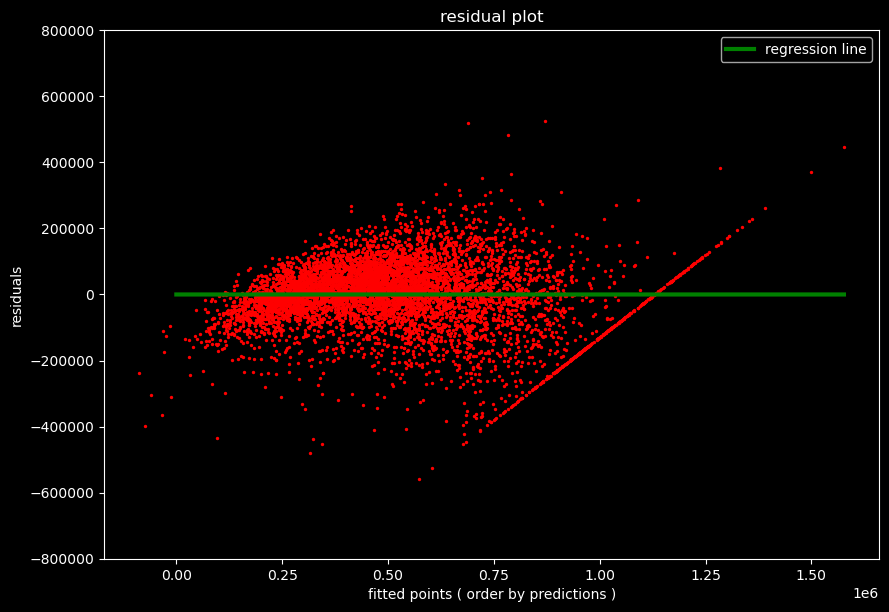

In [123]:
plt.figure(dpi = 100, figsize =(10,7))

plt.scatter(residual_table['predictions'],residual_table['residuals'],color = 'r',s = 2)
plt.plot(z,k,color = 'g',linewidth = 3, label = 'regression line')

plt.ylim(-800000,800000)
plt.xlabel("fitted points ( order by predictions )")
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

<AxesSubplot:ylabel='Density'>

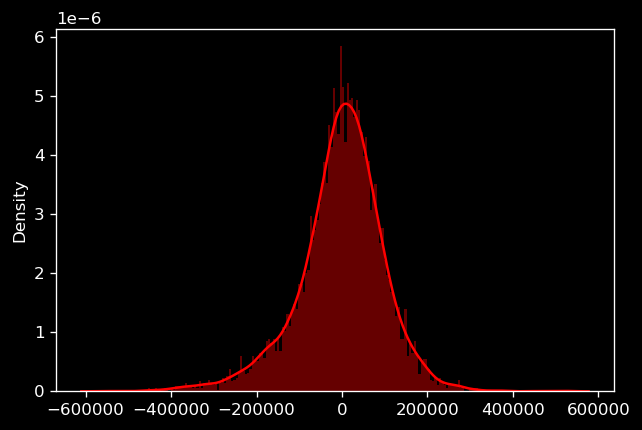

In [124]:
plt.figure(dpi = 120)
sns.distplot(x = residual_table['residuals'],color = 'r',bins = 200)

In [125]:
# interpreting the result of linear regression model

In [126]:
# model coefficients

In [127]:
coefficient_table = pd.DataFrame({"column":x_train.columns, "coefficients":lr.coef_})

coefficient_table = coefficient_table.sort_values(by = 'coefficients')
coefficient_table.head()

,column,coefficients
10,Longitude,-25016.505082
16,House_conditions_Fair,-12580.824874
13,Year since Renovation,-11156.419257
0,No of Bedrooms,-8994.323706
17,House_conditions_Okay,-6982.979416


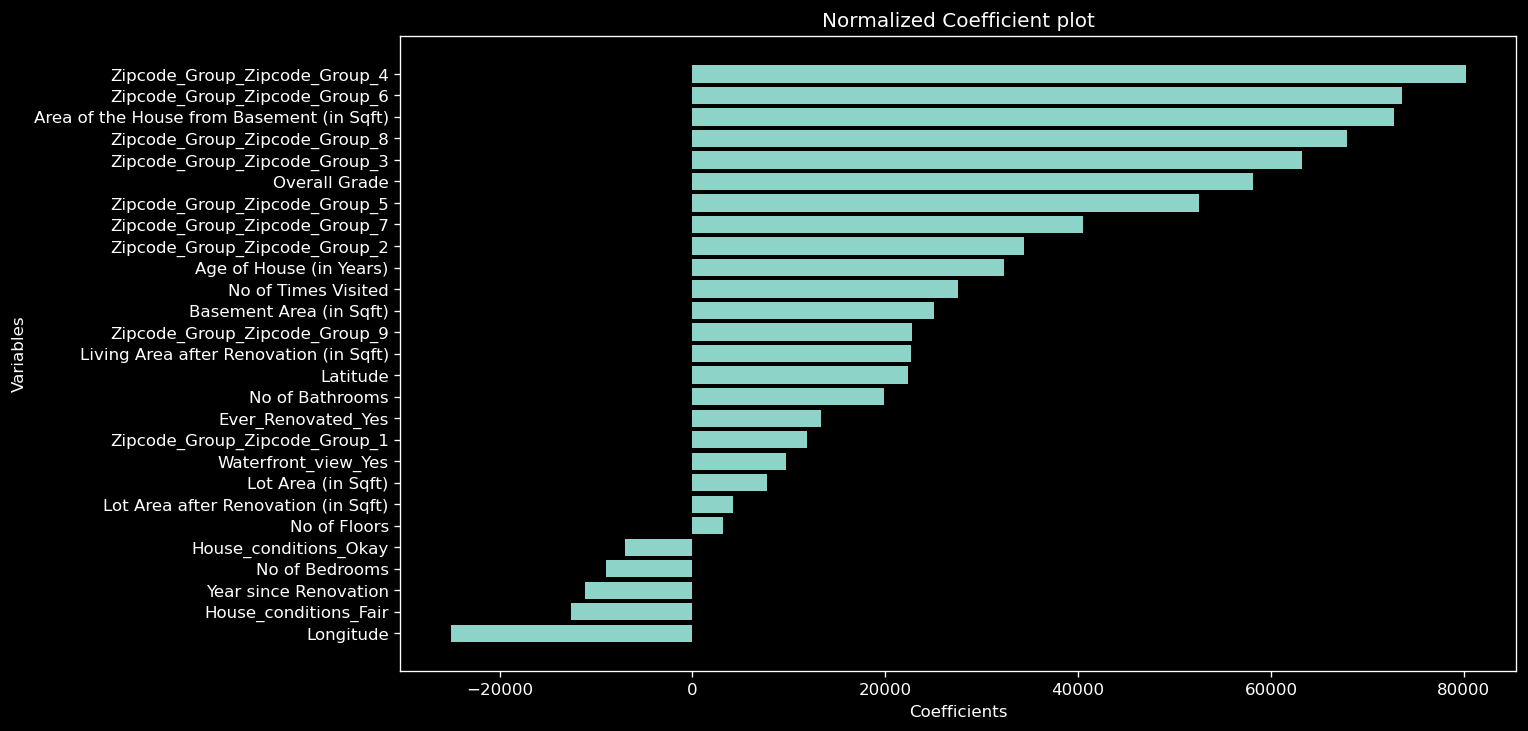

In [128]:
plt.figure(dpi = 120,figsize = (12,7))
x = coefficient_table['column']
y = coefficient_table['coefficients']

plt.barh(x, y)
plt.xlabel("Coefficients")
plt.ylabel("Variables")
plt.title("Normalized Coefficient plot")
plt.show()

#### Features with positive impact
-  It can be clearly see that, the zipcode_group_4 has come out to be the most significant independent variable in this model. Interestingling it is very much aligned to the natural intution that the location plays a major role in the sale price of a house. 

-  The 'Area of the House from Basement" has played a major role in the " Sale Price of the House. Which is again a natural intution.

-  Overall grade has also played a quite significant role.

-  Age of the house is somewhat a counter intutive. often it is rational to think that the older houses may be less expensive. But the model says that older houses are more expensive than the newer once.

-  Some other independent variables like (i) No of Times Visited,(ii) Basement Area (iii) Waterfornt view, (iv) Lot Area, (v) Latitude (vi) Renovated houses, (vii) No of Bathrooms has also quite significant and positive role.

#### Features with negative significance.
-  Year since renovation has recived quite a bit of negative significance. As time from the last renovation of the house is increased. the price of the house is decreased. Or Customers doesn't prefers the houses that are recently renovated.

- The most inference role played by the latitude and longitude. We can infer that longitude has singificant negative sigificance. Latitude has significant positive sigificance.

- If we interpret the gergraphical results. The houses in the North America ( North East region ) have relatively higher prices than other places.

- early on we can't even think about it. New information like this is where the esence of the data driven decisions lie in.



